# Autori 
        

Marco Vignini 6222137 marco.vignin@stud.unifi

Lorenzo Marino 6209034 lorenzo.marino@stud.unifi.it

# Chocolate Numbers
Questo notebook presenta un gioco svolto su una tavoletta rettangolare di cioccolata $m$ $\times$ $n$, dove $m$ è il numero delle righe in cui è divisa la tavoletta stessa ed $n$ il numero di colonne. Il gioco è strutturato in turni e consiste nella rottura della tavoletta da parte dei giocatori, secondo una linea verticale della griglia in cui è strutturata la tavoletta oppure orizzontale (può essere effettuata una rottura a turno). Il gioco continua fino a che non vengono ottenuti singoli quadratini di cioccolata e quindi finisce nel momento in cui uno dei due giocatori non può fare più rotture, perdendo così la partita. Possiamo affermare che il numero di rotture non dipende dal modo in cui vengono effettuate ma sono predeterminate. Nel notebook sono presenti la verifica delle relazioni di ricorrenza contenute nell'articolo [Chocolate Numbers][cn] e la simulazione del calcolo dei Chocolate Numbers che verranno presentati a breve. Inoltre le simulazioni numeriche hanno riguardato tanti teoremi, corollari e dimostrazioni contenute nell'articolo.
[cn]:https://cs.uwaterloo.ca/journals/JIS/VOL19/Khovanova/khova9.pdf

<b><font size = 3> Lemma: </font></b> In una griglia $m$ $\times$ $n$, il numero di rotture necessarie per ottenere $m$ $\times$ $n$ quadratini di cioccolata sono $m$ $\times$ $n$ $-$ $1$.

<b><font size = 3> Dimostrazione: </font></b> Ogni rottura provoca l'aumento di pezzi in cui è divisa la tavoletta di $1$, quindi iniziando con un pezzo unico e finendo con $m$ $\times$ $n$ quadratini le rotture effettuate sono esattamente $m$ $\times$ $n$ $-$ $1$.

Per prima cosa andiamo ad importare alcuni pacchetti che ci saranno utili per il resto del notebook:

In [1]:
from sympy import *
from sympy.utilities.lambdify import lambdify, implemented_function
from IPython.display import HTML

init_printing()

I Chocolate Numbers non sono altro che i possibili modi per rompere la nostra tavoletta. Tali numeri sono rappresentati dalla seguente formula di ricorrenza: 

$$ A_{m,n}=\sum_{i=1}^{m-1} \binom{mn-2}{in-1} A_{i,n}A_{m-i, n} + \sum_{i=1}^{n-1} \binom{mn-2}{im-1}A_{m,i}A_{m, n-i}$$ 

Possiamo implementare una funzione che calcola tutti i Chocolate Numbers fino a $A_{m,n}$, con m e n dimensioni della tavoletta: 



In [2]:
def ChocNum(m, n):
    A = zeros(m+1, n+1)
    A[1,1] = 1
    y = 1
    t = 2
    _sum = 0
    sum1 = 0
    sum2 = 0
    inizioT = 2
    flagInizioColonne = False
    for y in range(1, m+1):
        for t in range(inizioT, n+1):
            sum1 = sum(binomial(y*t-2, i*t-1)*A[i, t]*A[y-i, t] for i in range(1, y))
            sum2 = sum(binomial(y*t-2, j*y-1)*A[y, j]*A[y, t-j] for j in range(1, t))
            _sum = sum1 + sum2
            sum1 = 0
            sum2 = 0
            A[y, t] = _sum
        if flagInizioColonne == False:
            inizioT = inizioT - 1
            flagInizioColonne = True
    return A

In [3]:
def StampaA(): # Funzione per evitare la stampa degli 0 sulle righe e sulle colonne.
    return A[1:,1:]    

Abbiamo implementato una funzione chiamata $ChocNum(m, n)$ che prende in input le dimensioni della tavoletta di cioccolata della quale vogliamo sapere tutti i numeri di cioccolata per tutte le sue sotto-tavolette fino a $ {A}_{m,n} $. La funzione implementata popola una matrice con i Chocolate Numbers i cui indici di riga e di colonna corrispondono ad m e ad n, questo a scopo di maggiore leggibilità e praticità. Si ha quindi che la prima riga e la prima colonna risulteranno vuote. La matrice contenente i numeri di cioccolato viene riempita per righe, calcolando quindi $ {A}_{1,2} $, $ {A}_{1,3} $, ..., $ {A}_{1,n} $ poi $ {A}_{2,1} $, $ {A}_{2,2} $, ...,$ {A}_{2,n} $ quindi arrivando a calcolare $ {A}_{m,1} $, $ {A}_{m,2} $, ..., $ {A}_{m,n} $. La definizione sarà fondamentale nelle verifiche che verranno fatte successivamente nel notebook. Viene utilizzata la funzione $zeros()$ per inizializzare una matrice di zeri, con dimensione ($m+1$) $\times$ ($n+1$), poi viene inizializzato il caso base $A[1,1]=1$ dato che la formula di ricorrenza utilizza valori antecedenti a quello che calcola nell'iterazione corrente. 

In [4]:
A = ChocNum(5,5)     
StampaA()

⎡1     1        2              6                    24          ⎤
⎢                                                               ⎥
⎢1     4        56            1712                92800         ⎥
⎢                                                               ⎥
⎢2    56       9408         4948992             6085088256      ⎥
⎢                                                               ⎥
⎢6   1712    4948992      63352393728        2472100837326848   ⎥
⎢                                                               ⎥
⎣24  92800  6085088256  2472100837326848  3947339798331748515840⎦

Inoltre abbiamo implementato una versione simbolica della matrice che contiene le espressioni simboliche dei Chocolate Numbers fino all' $m$ $\times$ $n$ -esimo che ci sarà utile per alcune verifiche simboliche successive. Quindi definiamo una funzione che implementa il modello simbolico della matrice:

In [5]:
def MatriceSimbolica(r, c):
    i, m, n = symbols('i, m, n')
    A = MatrixSymbol('A', r, c)
    A = FunctionMatrix(r, c, Lambda((m,n), Sum(binomial(m*n-2, i*n-1)*A[i,n]*A[m-i, n],(i, 1, m-1)) + Sum(binomial(m*n-2, i*m-1)*A[m,i]*A[m, n-i],(i,1,n-1))))
    return A

Mostriamo un esempio della matrice simbolica appena implementata:

In [6]:
A = MatriceSimbolica(3,5)
Matrix(A[1:,1:]).doit()

⎡              2                                                              
⎢ 0         A₁₁               A₁₁⋅A₁₂ + A₁₂⋅A₁₁                A₁₁⋅A₁₃ + 2⋅A₁₂
⎢                                                                             
⎢   2       2        2       2                                2               
⎣A₁₁   2⋅A₁₂  + 2⋅A₂₁   6⋅A₁₃  + 4⋅A₂₁⋅A₂₂ + 4⋅A₂₂⋅A₂₁  20⋅A₁₄  + 6⋅A₂₁⋅A₂₃ + 

2                  ⎤
  + A₁₃⋅A₁₁        ⎥
                   ⎥
      2            ⎥
20⋅A₂₂  + 6⋅A₂₃⋅A₂₁⎦

<b><font size = 4> Corollario 3 </font></b> $$ {A}_{1,n} = {A}_{n,1} = (n-1)!$$

Verifichiamo numericamente questo corollario utilizzando un frammento di codice:

In [7]:
[factorial(i-1) for i in range(1,15)]

In [8]:
A = ChocNum(1, 14)
var = StampaA()
lvar = len(var)
[var[v] for v in range(lvar)]

Sottraendo i valori delle due liste otteniamo $0$ e dimostriamo la tesi:

In [9]:
[(v, factorial(v) - var[v]) for v in range(0, 14)]

<b><font size = 4> Corollario 4 </font></b> $$ A_{m,n} = A_{n,m} $$

Verifichiamo simbolicamente il corollario 4, sfruttando il fatto che se una matrice è uguale alla sua trasposta allora è simmetrica:

In [10]:
A = MatriceSimbolica(3,5)
At = Transpose(A)
Matrix(At[1:,1:]).doit()

⎡                                                 2                   ⎤
⎢            0                                 A₁₁                    ⎥
⎢                                                                     ⎥
⎢              2                               2        2             ⎥
⎢           A₁₁                           2⋅A₁₂  + 2⋅A₂₁              ⎥
⎢                                                                     ⎥
⎢                                      2                              ⎥
⎢    A₁₁⋅A₁₂ + A₁₂⋅A₁₁            6⋅A₁₃  + 4⋅A₂₁⋅A₂₂ + 4⋅A₂₂⋅A₂₁      ⎥
⎢                                                                     ⎥
⎢               2                  2                     2            ⎥
⎣A₁₁⋅A₁₃ + 2⋅A₁₂  + A₁₃⋅A₁₁  20⋅A₁₄  + 6⋅A₂₁⋅A₂₃ + 20⋅A₂₂  + 6⋅A₂₃⋅A₂₁⎦

Di seguito confrontiamo le espressioni simboliche presenti nelle righe della prima matrice con quelle delle colonne presenti nella seconda: visto che risultano uguali la matrice è simmetrica ed il corollario $4$ è dimostrato.

In [11]:
r = 3
c = 5
Lris = []

for i in range(1, r):
    for j in range(1,c):
        if A[i,j] == At[j,i]:
            Lris.append(True)
        else:
            Lris.append(False)
            
Lris

[True, True, True, True, True, True, True, True]

# Sequenze particolari di Chocolate Numbers

Chocolate-$2$ Numbers ($B_{n} = A_{2,n}$): sequenza di Chocolate Numbers con dimensione delle tavolette di cioccolato $2\times n$.

In [12]:
#Esempio della sequenza di Chocolate 2-Numbers...
A = ChocNum(2, 11)
A[2:, 1:]

[1  4  56  1712  92800  7918592  984237056  168662855680  38238313152512  1110
6033743298560  4026844843819663360]

Chocolate Square Numbers ($A_{n,n}$): sequenza di Chocolate Numbers con dimensione delle tavolette di cioccolato $n\times n$.

In [13]:
#Esempio della sequenza di Chocolate Square Numbers...
m = 7
n = 7
A = ChocNum(m, n)
[A[i, i] for i in range(1,n)]

Chocolate Triangle Numbers: sequenza di Chocolate Numbers visti come un triangolo e ordinati per righe.

In [14]:
#Esempio della sequenza di Chocolate Triangle Numbers...
m = 9
n = 9
A = ChocNum(m,n)
AT = zeros(m+1,n+1)
init = 0

for j in range(1, n+1):
    init = init + 1
    for i in range(init, m+1):
        AT[i, j] = A[i-j,j]
               
AT[1:, 1:]

⎡ 0        0            0                0                 0                0 
⎢                                                                             
⎢ 1        0            0                0                 0                0 
⎢                                                                             
⎢ 1        1            0                0                 0                0 
⎢                                                                             
⎢ 2        4            2                0                 0                0 
⎢                                                                             
⎢ 6       56            56               6                 0                0 
⎢                                                                             
⎢ 24     1712          9408             1712               24               0 
⎢                                                                             
⎢120     92800       4948992          4948992       

<b><font size = 4> Teorema 5 </font></b> <center>Se $m,n > 1$, allora $v_2(A_{m, n}) \geq m + n - 2$.</center>

Possiamo verificare questo teorema con degli esempi, ma prima vediamo come implementare la funzione $v_{2}()$ che rappresenta il 2-adic number, ovvero la più alta potenza di due che divide n.

In [15]:
def v2(numero):
    n2Adic = 0
    while numero % 2 == 0:
        n2Adic = n2Adic + 1
        numero //= 2
    return n2Adic       

Adesso abbiamo gli strumenti per verificare il Teorema 5. Prendiamo in considerazione i numeri di cioccolato $1712$, $9408$ e $4948992$ e effettuiamo una verifica numerica.

In [16]:
def verificaTeorema5(numero, m, n):
    if (m > 1 and n > 1):
        if (v2(numero) >= m + n - 2):
            print v2(numero), ' >= ',m,'+',n,'- 2' 
            return 'Teorema verificato'
        else: 
            return 'Teorema non verificato'
    else: return 'parametro/i non maggiore/i di 1 '


listaChocolateN = [1712, 9408, 4948992] # I primi due divisibili ed il terzo no.
listaM = [2, 3, 4]
listaN = [4, 3, 3]

for g in range(0, 3):
    ris = verificaTeorema5(listaChocolateN[g], listaM[g], listaN[g])
    print ris
    print

4  >=  2 + 4 - 2
Teorema verificato

6  >=  3 + 3 - 2
Teorema verificato

10  >=  4 + 3 - 2
Teorema verificato



<b><font size = 3> Dimostrazione: </font></b>

Procediamo per induzione, considerando il caso base $m=2$. Per il teorema $2$ e il corollario $3$ otteniamo:

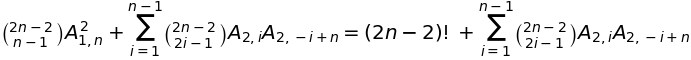

In [17]:
i, n = symbols('i, n')
A = MatrixSymbol('A', 3, 6) # Matrice simbolica 3x6 che rappresenta il caso 2x5.
exp1 = binomial(2*n-2, n-1)*A[1,n]*A[1,n] + Sum((binomial(2*n-2, 2*i-1)*A[2, i]*A[2,n-i]),(i, 1, n-1))
exp2 = factorial(2*n-2) + Sum((binomial(2*n-2, 2*i-1)*A[2, i]*A[2,n-i]),(i, 1, n-1))
f1 = implemented_function(Function('f1'), lambda t: binomial(2*n-2, n-1)*A[1,n]*A[1,n] + Sum((binomial(2*n-2, 2*i-1)*A[2, i]*A[2,n-i]),(i, 1, n-1)))
lam1 = lambdify((n), f1(n))
f2 = implemented_function(Function('f2'), lambda t: factorial(2*n-2) + Sum((binomial(2*n-2, 2*i-1)*A[2, i]*A[2,n-i]),(i, 1, n-1)))
lam2 = lambdify(n, f2(n))
expDimostrazione = Eq(exp1, exp2)
expDimostrazione

In [18]:
[(n, lam1(n) - lam2(n)) for n in range(1,4)]

Utilizzando una matrice simbolica possiamo osservare i passaggi finali dell'algoritmo, i quali rispettono la ricorrenza presentata all'inizio del notebook. In particolare possiamo osservare come certe operazioni rimangono astratte ma facciamo comunque una verifica numerica:

In [19]:
A = ChocNum(2, 5)
ListaConfronti = []
for n in range(1,6):
    s1 = binomial(2*n-2, n-1)*A[1, n]*A[1,n]
    s2 = sum(binomial(2*n-2, 2*i-1)*A[2, i]*A[2,n-i] for i in range(1,n))
    s3 = factorial(2*n-2)
    s4 = s1 + s2 - s3 - s2
    ListaConfronti.append((n,s4))
    
ListaConfronti

Verifichiamo in modo diretto che $v_2(B_{1}) = 0$ e che $v_2(B_{j}) = j$ per ogni $j = 2,3,4$.

In [20]:
A = ChocNum(2, 4)
[v2(A[2,i]) for i in range(1,5)]  

Possiamo notare che per $n>4$ si ha $v_2((2n-2)!) \geq n$

In [21]:
for n in range(5, 20):
    ris = v2(factorial(2*n-2))
    print 'v2((2*',n,'- 2)!) = ', ris
    
    if ris >= n:
        print 'Condizione verificata per n = ', n
        print
    else:
        print 'Condizione non verificata per n = ', n
        print

v2((2* 5 - 2)!) =  7
Condizione verificata per n =  5

v2((2* 6 - 2)!) =  8
Condizione verificata per n =  6

v2((2* 7 - 2)!) =  10
Condizione verificata per n =  7

v2((2* 8 - 2)!) =  11
Condizione verificata per n =  8

v2((2* 9 - 2)!) =  15
Condizione verificata per n =  9

v2((2* 10 - 2)!) =  16
Condizione verificata per n =  10

v2((2* 11 - 2)!) =  18
Condizione verificata per n =  11

v2((2* 12 - 2)!) =  19
Condizione verificata per n =  12

v2((2* 13 - 2)!) =  22
Condizione verificata per n =  13

v2((2* 14 - 2)!) =  23
Condizione verificata per n =  14

v2((2* 15 - 2)!) =  25
Condizione verificata per n =  15

v2((2* 16 - 2)!) =  26
Condizione verificata per n =  16

v2((2* 17 - 2)!) =  31
Condizione verificata per n =  17

v2((2* 18 - 2)!) =  32
Condizione verificata per n =  18

v2((2* 19 - 2)!) =  34
Condizione verificata per n =  19



Osserviamo che ogni termine di $\binom{2n-2}{2m-1}B_{m}B_{n-m}$ ha almeno un numero di potenze di $2$ come $B_{m}B_{n-m}$, che per ipotesi induttiva è almeno $n$ per $m \neq 1$,$ n-1$. Ma per $m=1, n-1$ i valori del prodotto $B_{m}B_{n-m}$ sono uguali a $B_{n-1}$ e per ipotesi induttiva hanno almeno $n-1$ potenze di $2$. Così otteniamo che $B_{n}$ ha almeno $n$ potenze di $2$ cioè $v_2(B_{n}) \geq n$.

Adesso assumiamo che il teorema valga per tutti gli $A_{m',n'}$ con $1<m'<m$ e $1<n'<n$ per $m,n > 2$ e proviamo il teorema per $A_{m,n}$: 

Consideriamo il primo sommando e notiamo che per ogni $i \neq 1, m-1$ si ha che:

$$ v_2(\binom{mn-2}{in-1}A_{i,n}A_{m-i, n}) \geq v_2(A_{i,n}A_{m-i, n}) \geq (i+n-2) + (m-i+n-2) \geq m+n-2 $$

Invece per $i=1, m-1$ si ha che:

$$ v_2(\binom{mn-2}{n-1} A_{1,n}A_{m-1, n} + \binom{mn-2}{mn-n-1}A_{m-1,n}A_{1, n}) = v_2(2\binom{mn-2}{n-1}A_{1,n}A_{m-1, n}) \geq v_2(2A_{m-1,n}) \geq 1+(m-1+n-2) = m + n - 2 $$ 

Lo stesso ragionamento viene ripetuto per il secondo sommando ed il teorema è dimostrato. Di seguito vengono riportate le simulazioni dei passaggi con alcuni valori:

In [22]:
m = 5
n = 5    
A = ChocNum(m,n)

risultati1 = []
risultati2 = []
risultati3 = []
risultati4 = []

# Prima catena di disuguaglianze per il primo sommando della ricorrenza (i != 1, m-1).

for i in range(2, m-1): 
    exp1 = v2(binomial(m*n-2, i*n-1)*A[i,n]*A[m-i,n])
    exp2 = v2(A[i,n]*A[m-i,n])
    exp3 = (i+n-2)+(m-i+n-2)
    exp4 = m+n-2
    if exp1 >= exp2 >= exp3 >= exp4:
        risultati1.append(True)
    else:
        risultati1.append(False)
        
indici = [1, m-1]

# Seconda catena di disuguaglianze per il primo sommando della ricorrenza (i = 1, m-1).

for i in indici: 
    exp1 = v2(binomial(m*n-2, n-1)*A[1,n]*A[m-1,n] + binomial(m*n - 2, m*n-n-1)*A[m-1, n]*A[1,n])
    exp2 = v2(2*binomial(m*n-2, n-1)*A[1,n]*A[m-1,n])
    exp3 = v2(2*A[m-1,n])
    exp4 = 1 + (m-1+n-2)
    exp5 = m+n-2
    
    if exp1 == exp2 and exp2 >= exp3 >= exp4 and exp4 == exp5: 
         risultati2.append(True)
    else:
        risultati2.append(False)
        
# Prima catena di disuguaglianze per il secondo sommando della ricorrenza (i != 1, n-1).

for i in range(2, n-1):
    exp1 = v2(binomial(m*n-2, i*m-1)*A[m,i]*A[m,n-i])
    exp2 = v2(A[m,i]*A[m,n-i])
    exp3 = (m+i-2)+(m+n-i-2)
    exp4 = m+n-2
    if exp1 >= exp2 and exp2 >= exp3 >= exp4:
        risultati3.append(True)
    else:
        risultati3.append(False)
        
indici2 = [1, n-1]

# Seconda catena di disuguaglianze per il secondo sommando della ricorrenza (i = 1, n-1)

for i in indici2:
    exp1 = v2(binomial(m*n-2, m-1)*A[m,1]*A[m,n-1] + binomial(m*n - 2, m*n-m-1)*A[m,n-1]*A[m,1])
    exp2 = v2(2*binomial(m*n-2, m-1)*A[m,1]*A[m,n-1])
    exp3 = v2(2*A[m, n-1])
    exp4 = 1 + (m+n-1-2)
    exp5 = m+n-2
    
    if exp1 == exp2 and exp2 >= exp3 >= exp4 and exp4 == exp5: 
         risultati4.append(True)
    else:
        risultati4.append(False)

In [23]:
risultati1

[True, True]

In [24]:
risultati2

[True, True]

In [25]:
risultati3

[True, True]

In [26]:
risultati4

[True, True]

<b><font size = 4> Corollario 6 </font></b> <center>Per la sequenza $B_{n}$ dei 2-Chocolate Numbers $v_2(B_{n}) \geq n$, per $n \geq 1$.</center>

In [27]:
A = ChocNum(2, 5)

for i in range(2, n+1):
    if v2(A[2,i]) >= i:
        print 'v2(',A[2,i], '): limitato inferiormente da -->', i
    else:
        print 'Condizione non verificata'

v2( 4 ): limitato inferiormente da --> 2
v2( 56 ): limitato inferiormente da --> 3
v2( 1712 ): limitato inferiormente da --> 4
v2( 92800 ): limitato inferiormente da --> 5


<b><font size = 4> Corollario 7 </font></b> <center>Per la sequenza $a(n)$ dei chocolate squares numbers, $v_2(a(n)) \geq 2n-2$.</center> 

<b><font size = 3> Verifica numerica: </font></b>

In [28]:
n = 5
A = ChocNum(n, n)

for i in range(1, n):
    if v2(A[i,i]) >= (2*i-2):
        print 'v2(', A[i,i], '): limitato inferiormente da -->', 2*i-2
    else:
        print 'Condizione non verificata'

v2( 1 ): limitato inferiormente da --> 0
v2( 4 ): limitato inferiormente da --> 2
v2( 9408 ): limitato inferiormente da --> 4
v2( 63352393728 ): limitato inferiormente da --> 6


Da questo punto del Notebook prenderemo in considerazione soltanto la sequenza $B_{n}=A_{2,n}$ dei chocolate 2-numbers. A questo proposito ricordiamo la seguente ricorsione (Teorema $8$ dell'articolo), verificata nella dimostrazione del teorema $5$: $$B_{n} = (2n-2)! + \sum_{m=1}^{n-1} \binom{2n-2}{2m-1} B_{m}B_{n-m}$$

Abbiamo visto nella parte precedente del notebook che $B_{n}$ è divisibile per $2^n$ ma possiamo osservare che questi numeri hanno anche altri divisori. Ad esempio molti di questi elementi sono divisibili anche per $5$ e/o $11$. Consideriamo alcuni chocolate-$2$ numbers:

In [29]:
A = ChocNum(2, 8)
Lst = A[2:, 1:]
[primefactors(Lst[i]) for i in range(1, len(Lst))]

<b><font size = 4> Teorema 9: </font></b> Sia $n$ un intero positivo. Se $k$ è un intero positivo che divide $B_{i}$ $\forall \lfloor{\frac{n+1}{2}}\rfloor \leq i \leq n-1$ e soddisfa $k \mid (2n-2)!$, allora $k \mid B_{j} \forall j \geq n$.

<b><font size = 3> Dimostrazione: </font></b>

Per induzione su $n$. Dato che $k$ divide ognuno dei fattori nella sommatoria ed anche $(2n-2)!$, deve dividere anche $B_{n}$.
Assumiamo che il risultato valga per $n$, $n+1$, ..., $m$ e proviamo il risultato per $m+1$. Dato che $m \geq n$, si ha che $k \mid (2m-2)!$ e dato che $k \mid B_{j}$, per $\forall \lfloor{\frac{n+1}{2}}\rfloor \leq k \leq n-1$, $k$ deve dividere $B_{m+1}$ per il ragionamento fatto in precedenza.

Questo teorema è la generalizzazione dei corollari successivi, quindi si vedano le verifiche numeriche seguenti.

<b><font size = 4> Corollario 10: </font></b> <center>Per ogni $i \geq 6$, $11\mid B_{i}$</center> 

<b><font size = 3> Dimostrazione: </font></b> Attraverso il controllo che 11 divide $B_{3}, B_{4}$ e $B_{5}$, il risultato deriva immediatamente dal teorema $9$.

<b><font size = 3> Verifica numerica: </font></b>

In [30]:
A = ChocNum(2, 12)

for i in range(6, 13):
    if A[2, i] % 11 == 0:
        print A[2, i], ' risulta divisibile per 11'
    else:
        print A[2, i], ' non risulta divisibile per 11'

7918592  risulta divisibile per 11
984237056  risulta divisibile per 11
168662855680  risulta divisibile per 11
38238313152512  risulta divisibile per 11
11106033743298560  risulta divisibile per 11
4026844843819663360  risulta divisibile per 11
1784377436257886142464  risulta divisibile per 11


<b><font size = 4> Corollario 11 </font></b> <center>Per ogni $i \geq 13$, $5 \mid B_{i}$</center>

<b><font size = 3> Dimostrazione: </font></b>
Come si vede nella parte di simulazione sottostante, $5\mid B_{i}$, per ogni $13 \leq i \leq 24$. Quindi dal teorema $9$ deriva immediatamente.

In [31]:
A = ChocNum(2, 24)

for i in range(13, 25):
    if A[2, i] % 5 == 0:
        print A[2, i], ' risulta divisibile per 5'
    else:
        print A[2, i], ' non risulta divisibile per 5'

949324216111786046259200  risulta divisibile per 5
597340801661667138076672000  risulta divisibile per 5
438858704839955952346364641280  risulta divisibile per 5
372304335009232578769863468646400  risulta divisibile per 5
361194379506079387834590582695526400  risulta divisibile per 5
397344485914557234504637557435583692800  risulta divisibile per 5
491949427176284060395435571314810054246400  risulta divisibile per 5
680935947093241518407581695028056417107968000  risulta divisibile per 5
1047458042788816755649494968134208487286007398400  risulta divisibile per 5
1781087350387025103895610601866361576831572561100800  risulta divisibile per 5
3331580558822128328839570009157051606629827292954624000  risulta divisibile per 5
6825341427180849441677409850339430903567856502815535923200  risulta divisibile per 5


# Funzioni Generatrici

Cerchiamo una forma esplicita per la funzione generatrice dei chocolate-$2$ numbers usando funzioni ipergeometriche. Consideriamo la funzione: <br><br>$$ f(X) = \sum_{n \geq 1} \frac{B_{n}}{(2n-1)!}X^n $$

<b><font size = 4> Lemma 12: </font></b>La funzione $f(X)$ soddisfa la seguente equazione differenziale: <br><br>$$ f'(X) = \frac{1}{2(1-X)} + \frac{1}{2X}f(X) + \frac{1}{2X}f(X)^2 $$

<b><font size = 3> Dimostrazione: </font></b>

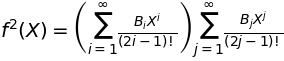

In [32]:
f = Function('f')
i, j, X, Bi, Bj = symbols('i, j, X, B_{i}, B_{j}')
exp1 = Sum(Bi/(factorial(2*i-1))*X**i, (i, 1, oo))*Sum(Bj/(factorial(2*j-1))*X**j, (j, 1, oo))
eq1 = Eq(f(X)**2, exp1)
eq1

In [33]:
m, n, Bm, Bnm = symbols('m, n, B_{m}, B_{n-m}')
exp2 = Sum(Sum((Bm*Bnm*X**n)/(factorial(2*m-1)*factorial(2*n-2*m-1)),(m, 1, n-1)),(n, 2, oo))
eq2 = Eq(exp1, exp2)
eq2

⎛  ∞             ⎞   ∞                  ∞   n - 1                             
⎜ ____           ⎟  ____               ____  ____                             
⎜ ╲              ⎟  ╲                  ╲     ╲                                
⎜  ╲           i ⎟   ╲           j      ╲     ╲                        n      
⎜   ╲   B_{i}⋅X  ⎟    ╲   B_{j}⋅X        ╲     ╲        B_{m}⋅B_{n-m}⋅X       
⎜   ╱  ──────────⎟⋅   ╱  ────────── =    ╱     ╱  ────────────────────────────
⎜  ╱   (2⋅i - 1)!⎟   ╱   (2⋅j - 1)!     ╱     ╱   (2⋅m - 1)!⋅(-2⋅m + 2⋅n - 1)!
⎜ ╱              ⎟  ╱                  ╱     ╱                                
⎜ ‾‾‾‾           ⎟  ‾‾‾‾               ‾‾‾‾  ‾‾‾‾                             
⎝i = 1           ⎠ j = 1              n = 2 m = 1                             

Si può ricavare dal Teorema $8$, dividendo ambo i membri per $(2n-2)!$ che: 

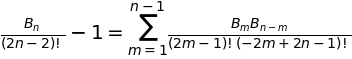

In [34]:
Bn = symbols('B_{n}')
exp3 = Bn/factorial(2*n-2) - 1
exp4 = Sum((Bm*Bnm)/(factorial(2*m-1)*factorial(2*n-2*m-1)),(m, 1, n-1))
eq3 = Eq(exp3, exp4)
eq3

In [35]:
exp4 = Sum(Sum((Bm*Bnm*X**n)/(factorial(2*m-1)*factorial(2*n-2*m-1)),(m, 1, n-1)),(n, 2, oo))
exp5 = Sum((Bn*X**n)/factorial(2*n-2),(n, 2, oo)) - Sum(X**n,(n, 2, oo))
eq4 = Eq(exp4, exp5)
eq4

  ∞   n - 1                                               ∞             
 ____  ____                                    ∞         ____           
 ╲     ╲                                      ___        ╲              
  ╲     ╲                        n            ╲           ╲           n 
   ╲     ╲        B_{m}⋅B_{n-m}⋅X              ╲    n      ╲   B_{n}⋅X  
   ╱     ╱  ──────────────────────────── = -   ╱   X  +    ╱  ──────────
  ╱     ╱   (2⋅m - 1)!⋅(-2⋅m + 2⋅n - 1)!      ╱           ╱   (2⋅n - 2)!
 ╱     ╱                                      ‾‾‾        ╱              
 ‾‾‾‾  ‾‾‾‾                                  n = 2       ‾‾‾‾           
n = 2 m = 1                                             n = 2           

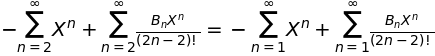

In [36]:
exp6 = Sum((Bn*X**n)/factorial(2*n-2),(n, 1, oo)) - Sum(X**n,(n, 1, oo))
eq5 = Eq(exp5, exp6)
eq5

Per l'argomento della prima sommatoria cambiamo l'estremo facendolo partire da $0$, in modo tale da ottenere la funzione generatrice della sequenza di tutti $1$, sottratta a $1$ per ottenere una sommatoria equivalente. Per l'argomento della seconda sommatoria moltiplico numeratore e denominatore per $2n-1$.

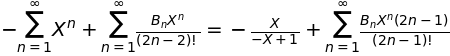

In [37]:
exp7 = Sum(((2*n-1)*Bn*X**n)/factorial(2*n-1), (n, 1, oo)) - X / (1-X)
eq6 = Eq(exp6, exp7)
eq6

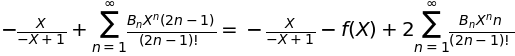

In [38]:
exp8 = 2*Sum((n*Bn*X**n)/factorial(2*n-1),(n, 1, oo)) - f(X) - X / (1-X)
eq7 = Eq(exp7, exp8)
eq7

Adesso calcoliamo la derivata di f(X), la sostituiamo nell'equazione precedente e otteniamo:

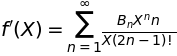

In [39]:
df = Function("f'")
exp9 = Sum(Bn*X**n/(factorial(2*n-1)), (n, 1, oo))
exp10 = diff(exp9, X)
eq8 = Eq(df(X), exp10)
eq8

In [40]:
exp11 = 2*X*df(X) - f(X) - X / (1-X)
eq9 = Eq(f(X)**2, exp11)
eq9

Da questa equazione ricaviamo $f'(X)$ e dimostriamo la tesi:

In [41]:
exp12 = 1/(2*(1-X)) + f(X)/(2*X) + f(X)**2/(2*X)
eq10 = Eq(df(X), exp12)
eq10

L'equazione appena ottenuta è detta equazione di Riccati e può essere ridotta ad un'equazione differenziale lineare del secondo ordine. A questo proposito introduciamo la seguente funzione:

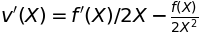

In [42]:
v = Function('v')
exp1 = 1/(2*X)*f(X)
eq1 = Eq(v(X), exp1)
exp2 = diff(exp1, X)
exp3 = exp2.subs(diff(f(X)), df(X))
dv = Function("v'")
eq2 = Eq(dv(X), exp3)
eq2

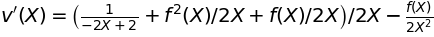

In [43]:
exp3 = exp3.subs(df(X), exp12)
exp3.expand()
eq3 = Eq(dv(X) ,exp3)
eq3

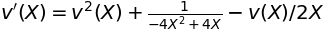

In [44]:
exp3 = exp3.subs(f(X)/(2*X), v(X))
exp3 = exp3.expand()
exp3 = exp3.subs(f(X)/(2*X), v(X))
exp3 = exp3.expand()
eq4 = Eq(dv(X) ,exp3)
eq4

L'equazione appena ottenuta è della forma:

In [45]:
R = Function('R')
S = Function('S')
u = Function('u')
du = Function("u'")
x = symbols("x")
exp4 = v(X)**2 + R(x)*v(X) + S(x)
eq5 = Eq(dv(X), exp4)
eq5

e si risolve con la sostituzione:

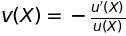

In [46]:
exp5 = -du(X) / u(X)
eq4 = Eq(v(X), exp5)
eq4

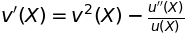

In [47]:
exp6 = diff(exp5, X)
du2 = Function("u''")
exp6 = exp6.subs(diff(du(X)), du2(X))
exp6 = exp6.subs(diff(u(X)), du(X))
exp6 = exp6.subs(du(X)**2/(u(X)**2), v(X)**2)
eq5 = Eq(dv(X), exp6)
eq5

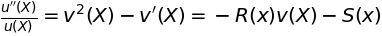

In [48]:
exp7 = du2(X)/u(X)
exp8 = v(X)**2 - dv(X)
eq6 = Eq(exp7, exp8)
exp9 = -S(x) - R(x)*v(X)
eq7 = Eq(eq6, exp9)
eq7

Visto che: $$v(X) = \frac{-u'(X)}{u(X)}$$

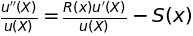

In [49]:
exp9 = exp9.subs(v(X), exp5)
eq8 = Eq(exp7, exp9)
eq8

Moltiplichiamo ambo i membri per $u(X)$ e otteniamo l'equazione generica che cercavamo:

In [50]:
exp10 = exp9*u(X)
exp10 = exp10.expand()
exp11 = exp7*u(X)
eq9 = Eq(exp11-exp10, 0)
eq9

Nel caso della nostra equazione si ha che:

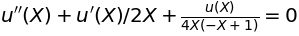

In [51]:
exp13 = du2(X) + du(X)/(2*X) + u(X)/(4*X*(1-X))
eq11 = Eq(exp13, 0)
eq11

# Funzioni Ipergeometriche

Una [funzione ipergeometrica][iper] è definita per $\mid X \mid$ $< $ $1$ in questo modo: $$ {}_2 {F_{1}(a,b;c;X)} = {}_2 {F_{1}(a_{1}, a_{2}; b_{1}, b_{2}; c_{1}; X)} = \sum_{n=0}^{\infty}{\frac{(a)_{n}(b)_{n}}{(c)_{n}} \frac{X^n}{n!}}$$
[iper]:https://it.wikipedia.org/wiki/Serie_ipergeometrica

dove $(q)_{n}$ è chiamato [simbolo di Pochhammer][sp] ed è definito come:
[sp]:https://it.wikipedia.org/wiki/Fattoriale_crescente

$$
\begin{equation}
    \begin{cases}
        1 \ se \ n=0 \\ q(q+1)...(q+n-1) \ se \ n>0
\end{cases}
\end{equation}
$$

La funzione ipergeometrica è una soluzione dell'[equazione differenziale ipergeometrica di Eulero][Eulero]:
[Eulero]:https://it.wikipedia.org/wiki/Equazione_ipergeometrica

In [52]:
X, a, b, c = symbols('X, a, b, c')
w = Function('w')
dw = Function("w'")
dw2 = Function("w''")
exp = X*(1-X)*dw2(X) + (c - (a + b + 1)*X)*dw(X) - a*b*w(X)
Eulero = Eq(exp, 0)
Eulero

Dall'equazione generica adesso ricaviamo la funzione $u(X)$ con il seguente lemma:

<b><font size = 3> Lemma 13 </font></b>: $$ u = {}_2 {F_{1}( \frac{-1-\sqrt{5}}{4}, \frac{-1+ \sqrt{5}}{4}; \frac{1}{2}; X)} $$ 

<b><font size = 3> Dimostrazione: </font></b>

L'equazione generica può essere riscritta moltiplicando ambo i membri per $X(1-X)$:

In [53]:
lEulero = Lambda([a, b, c], exp)
expEulero = lEulero((-1-sqrt(5))/4, (-1+sqrt(5))/4, Integer(1)/(2)).doit()
eqEulero = Eq(expEulero, 0)
eqEulero = eqEulero.subs(dw2(X), du2(X))
eqEulero = eqEulero.subs(dw(X), du(X))
eqEulero = eqEulero.subs(w(X), u(X))

Sviluppando il coefficiente di u(X) otteniamo:

$$ X(1-X)u''(X) + (\frac{1}{2}-\frac{X}{2})u'(X) + \frac{u(X)}{4} = 0$$

Da qui si ricava che $c=\frac{1}{2}$, $a+b = -\frac{1}{2}$ e $ab = -\frac{1}{4}$

<b><font size = 4> Teorema 14: </font></b> La funzione generatrice dei Chocolate-2 Numbers è:

$$f(X) = -2X \frac{d}{dx}\log({}_2 {F_{1}( \frac{-1-\sqrt{5}}{4}, \frac{-1+ \sqrt{5}}{4}; \frac{1}{2}; X)})$$

Svolgiamo qualche manipolazione allo scopo di semplificare la serie. In prima istanza sostituiamo i valori specifici di $a$, $b$ e $c$ nella formula della funzione ipergeometrica:

$${}_2 {F_{1}( \frac{-1-\sqrt{5}}{4}, \frac{-1+ \sqrt{5}}{4}; \frac{1}{2}; X)} = \sum_{n=0}^{\infty} \frac{(\frac{-1-\sqrt{5}}{4})_{n} (\frac{-1+\sqrt{5}}{4})_{n}X^{n}} {(\frac{1}{2})_{n}n!}$$

Successivamente esplicitiamo le produttorie:

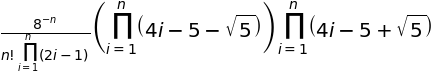

In [54]:
n, i = symbols("n, i")
t14 = Product(((4*i-5)-sqrt(5)), (i, 1, n))*Product(((4*i-5)+sqrt(5)), (i, 1, n)) / ((8**n)*Product(2*i-1,(i, 1, n))*factorial(n))
t14

Svolgiamo il prodotto fra le due produttorie al numeratore e riscriviamo il denominatore $$8^{n} \prod_{i=1}^{n}{(2i-1)}$$ come $$\frac{4^{-n}}{(2n)!}$$

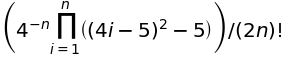

In [55]:
t142 = Product(((4*i-5)**2) - 5,(i, 1, n)) / (4**n*(factorial(2*n)))
t142

Quindi verifichiamo numericamente che gli argomenti delle funzioni generatrici manipolate siano equivalenti:

In [56]:
lexp = Lambda([n], t14)
lexp2 = Lambda([n], t142)
[(h, lexp(h).doit().simplify() - lexp2(h).doit().simplify()) for h in range (1, 12)]

Denotiamo il numeratore ottenuto con $P_{n}$:

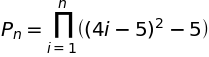

In [57]:
i, n = symbols('i, n')
Pn = Function('P_{n}')
pn = Product((4*i-5)**2-5, (i, 1, n))
eqP = Eq(Pn, pn)
lP = Lambda([n], pn)
eqP

<b><font size = 4> Lemma 15: </font></b> La sequenza $P_{n}$ modulo $p$, con $p$ numero primo, converge ad una sequenza di tutti zero se solo se $p = 2, 5$ o $p$ $\equiv$ $\pm 1$ $( \mod 5$ $)$.

<b><font size = 3> Verifica numerica: </font></b>

In [58]:
ListaP = [2, 5]

for i in sieve.primerange(7, 500):
    if (i + 1) % 5 == 0 or (i - 1) % 5 == 0:
        ListaP.append(i)

[(n, lP(n).doit() % n) for n in ListaP]

<b><font size = 3> Dimostrazione: </font></b>

Se $P_{i} \equiv 0 \mod p$ per qualche indice $i$ la sequenza converge a zero, come abbiamo verificato numericamente in precedenza. Osserviamo che $P_{1}=-4$ e che $P_{5}$ è divisibile per $5$. 

In [59]:
P1 = lP(1).doit()
P5 = lP(5).doit()
if P5 % 5 == 0: # verifico che P5 sia divisibile per 5
    print 'P1 =', P1
    print 'P5 =', P5
else:
    null

P1 = -4
P5 = -17966080


Questo significa che la sequenza converge quando $p$ vale $2$ o $5$. Altrimenti assumiamo che $p$ sia un numero primo dispari diverso da $5$. Se esiste un intero positivo $x$ tale che $x^2 \equiv 5 (\mod p)$, impostiamo $i \equiv (x+5)$ $4^{-1} (\mod p)$.
Quindi $x=4i-5$ e si ha $(4i-5)^2 \equiv 5 (\mod p)$.Tale $i$ esiste se e solo se $5$ è un [residuo quadratico][link]  <b>(mod p)</b>. Per la legge della [reciprocità quadratica][link2] si ha che $(\frac{5}{p}) (\frac{p}{5}) = (-1)^{p-1} = 1$, così $5$ è un residuo quadratico <b>(mod p)</b> se e solo se lo è $p$, che è equivalente a $p \equiv 1 (\mod 5)$ o $p \equiv 4 (\mod 5)$.
[link]:https://it.wikipedia.org/wiki/Residuo_quadratico
[link2]:https://it.wikipedia.org/wiki/Reciprocit%C3%A0_quadratica

La sequenza dei numeri primi congruenti ad $1$ o $4$ ( mod $5$) può essere definita come i numeri primi $p$ che dividono $F_{p-1}$ cioè il numero di Fibonacci con indice $p-1$.

In [60]:
ListaP[0:2] = []

In [61]:
ListaF = [fibonacci(x) for x in range(0, 50)]
ListaF

In [62]:
ris = [True for j in range(0,5) if ListaF[ListaP[j]-1] % ListaP[j] == 0]
ris

[True, True, True, True, True]

Abbiamo verificato la connessione tra la sequenza dei numeri primi congruenti a $1$ o $4$ <b>(mod 5)</b> e la sequenza dei numeri di Fibonacci. Questa conessione non ci stupisce visto che i primi due parametri della funzione ipergeometrica sono la [sezione aurea][aurea] e la sua inversa, scalati rispettivamente di $-\frac{1}{2}$ e $\frac{1}{2}$.
[aurea]:https://it.wikipedia.org/wiki/Sezione_aurea

Calcolando il modulo dei Chocolate Numbers con differenti numeri primi, sembra che le sequenze $B_{n}$ e $P_{n}$ diventino periodiche per gli stessi numeri primi. Questo motiva la sequente congettura:

<b><font size = 4> Congettura 16: </font></b> La sequenza $B_{n}$ <b>(mod p)</b>, con $p$ numero primo, converge ad una sequenza di tutti zero se solo se $p = 2, 5$ o $p$ $\equiv$ $\pm 1$ $( \mod 5$ $)$.

Il corollario $6$ prova che $B_{n}$ diventa un numero pari, il corollario $10$ prova che $B_{n}$ diventa divisibile per $11$, il corollario $11$ prova che $B_{n}$ diventa divisibile per $5$ e quindi abbiamo una prova della congettura per $p=2, 5$ e per $p$ uguale al più piccolo numero primo congruo $1$ o $4$ (mod $5$).